In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV,cross_val_score,learning_curve,validation_curve
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import pearsonr,randint
from sklearn.datasets import load_iris,load_digits
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import PCA
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

sklearn官方文档：https://scikit-learn.org/stable/index.html  
sklearn中文文档：http://sklearn.apachecn.org/#/

# 模型选择

## 回归模型

1、线性回归LinearRegression()  
2、决策树回归DecisionTreeRegressor()  
3、SVM回归SVR()  
4、随机森林回归RandomForestRegressor()  
5、KNN回归KNeighborsRegressor()  
6、AdaBoost回归AdaBoostRegressor()  
7、GBRT回归GradientBoostingRegressor()  
8、Bagging回归BaggingRegressor()  
9、极端随机数回归ExtraTreeRegressor()

## 分类模型

1、KNN分类KNeighborsClassifier()  
2、SVM分类SVC()  
3、逻辑回归分类LogisticRegression()  
4、随机森林RandomForestClassifier()  
5、高斯朴素贝叶斯GaussianNB()  
6、多项式朴素贝叶斯MultinomialNB()  
7、伯努利朴素贝叶斯BernoulliNB()  
8、决策树decision_tree_classifier()  
9、GBDT分类 GradientBoostingClassifier()  
10、AdaBoost分类AdaBoostClassifier()  
11、极端树分类ExtraTreesClassifier()  
12、Bagging分类BaggingClassifier()

## 模型选择案例

In [ ]:
###########1.数据生成部分##########
def f(x1, x2):
    y = 0.5 * np.sin(x1) + 0.5 * np.cos(x2) + 3 + 0.1 * x1 
    return y

def load_data():
    x1_train = np.linspace(0,50,500)
    x2_train = np.linspace(-10,10,500)
    data_train = np.array([[x1,x2,f(x1,x2) + (np.random.random(1)-0.5)] for x1,x2 in zip(x1_train, x2_train)])
    x1_test = np.linspace(0,50,100)+ 0.5 * np.random.random(100)
    x2_test = np.linspace(-10,10,100) + 0.02 * np.random.random(100)
    data_test = np.array([[x1,x2,f(x1,x2)] for x1,x2 in zip(x1_test, x2_test)])
    return data_train, data_test

train, test = load_data()
x_train, y_train = train[:,:2], train[:,2] #数据前两列是x1,x2 第三列是y,这里的y有随机噪声
x_test ,y_test = test[:,:2], test[:,2] # 同上,不过这里的y没有噪声


###########2.回归部分##########
def try_different_method(model):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    result = model.predict(x_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('score: %f'%score)
    plt.legend()
    plt.show()


###########3.具体方法选择##########
####3.1决策树回归####
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()
####3.2线性回归####
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()
####3.3SVM回归####
from sklearn import svm
model_SVR = svm.SVR()
####3.4KNN回归####
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
####3.5随机森林回归####
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树
####3.6Adaboost回归####
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50)#这里使用50个决策树
####3.7GBRT回归####
from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树
####3.8Bagging回归####
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor()
####3.9ExtraTree极端随机树回归####
from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor()


###########4.具体方法调用部分##########
try_different_method(model_DecisionTreeRegressor)

#  模型调参

## 网格搜索GridSearchCV

sklearn调参的核武器—gridsearchcv，它存在的意义就是自动调参，只要把参数输进去，就可以对算法进行相应的调优，暴力搜索所有参数组合，找到合适的参数。然而，在小数据集上还可以小打小闹。一旦数据的量级上去了，就很难得到结果，而且会报出memory error等错误。  
**class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)**  
**参数：**  
estimator：所使用的分类器，分类器已传入除需要确定最佳的参数之外的其他参数。  
param_grid：值为字典或者列表，即需要最优化的参数的取值。 可以通过一个列表中多个字典分开分类器，对每个字典分别网格搜索   
scoring :准确度评价标准，默认None,根据所选模型不同，评价准则不同。  
fit_params：传递给估计器的拟合方法的参数。    
cv :交叉验证参数，默认None，使用3折交叉验证。    
refit :默认为True,程序将会以交叉验证训练集得到的最佳参数，重新对所有可用的训练集与开发集进行，作为最终用于性能评估的最佳模型参数。  
iid:默认True,为True时，默认为各个样本fold概率分布一致，误差估计为所有样本之和，而非各个fold的平均。  
verbose：日志冗长度，int：冗长度，0：不输出训练过程，1：偶尔输出，>1：对每个子模型都输出。  
n_jobs: 并行数，int：个数,-1：跟CPU核数一致, 1:默认值。  
pre_dispatch：指定总共分发的并行任务数。当n_jobs大于1时，数据将在每个运行点进行复制，这可能导致OOM，而设置pre_dispatch参数，则可以预先划分总共的job数量，使数据最多被复制pre_dispatch  
**返回：**    
grid_scores_：给出不同参数情况下的评价结果  
best_params_：描述了已取得最佳结果的参数的组合  
best_score_：成员提供优化过程期间观察到的最好的评分   
best_estimator_：最好的分类器

In [ ]:
iris = datasets.load_iris()
parameters = {'kernel':['linear', 'rbf'], 'C':[1, 2, 4], 'gamma':[0.125, 0.25, 0.5 ,1, 2, 4]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters, n_jobs=-1)
clf.fit(iris.data, iris.target)

print('最优的模型参数:',clf.best_params_)

y_pred = clf.predict(iris.data)
print(classification_report(y_true=iris.target, y_pred=y_pred))

print('最好的模型:',clf.best_estimator_)

**特殊情况下，需要进行分组验证、存在类别特征等，在GridSearchCV的fit方法中通过groups和fit_params指定**

In [ ]:
params_test1={'max_depth': list(range(30,37,2)), 'num_leaves':list(range(350, 460, 20))}
fit_params = {'categorical_feature':categorical_cols}

gbm_model = lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',metrics='auc',learning_rate=0.1, n_estimators=1000) 
gkf = GroupKFold(n_splits=3)

gsearch1 = GridSearchCV(estimator = gbm_model,param_grid = params_test1, scoring='roc_auc',cv=gkf,n_jobs=1)
gsearch1.fit(data_train_X,data_train_y,groups,**fit_params)
gsearch1.cv_results_['mean_test_score'], gsearch1.best_params_, gsearch1.best_score_

"""使用GridSearchCV对lightGBM进行调参时，参数n_jobs设为1，否则会出现线程问题（没理解），很长时间不出结果
https://stackoverflow.com/questions/45045938/python-lightgbm-with-gridsearchcv-is-running-forever"""

## 随机搜索RandomizedSearchCV

RandomizedSearchCV类实现了在参数空间上进行随机搜索的机制，给参数一个范围，然后系统随机选择参数，进行检验，然后选择最好的这个概率分布描述了对应的参数的所有取值情况的可能性，这种随机采样机制与网格穷举搜索相比，有两大优点：  
•相比于整体参数空间，可以选择相对较少的参数组合数量  
•添加参数节点不影响性能，不会降低效率  


In [ ]:
# 生成数据
digits = load_digits()
X, y = digits.data, digits.target

# 元分类器
meta_clf = RandomForestClassifier(n_estimators=20)

# 设置参数
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "min_samples_leaf": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# 运行随机搜索 RandomizedSearch
n_iter_search = 20
rs_clf = RandomizedSearchCV(meta_clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)


rs_clf.fit(X, y)
print('最优的模型参数:',rs_clf.best_params_)
print('最好的模型:',rs_clf.best_estimator_)

# 模型评估

## estimator自带score

sklearn中的estimator都具有一个score方法，提供了一个缺省的评估法则。

In [ ]:
from sklearn.linear_model.logistic import LogisticRegression
iris = load_iris()
x = iris.data
y = iris.target
X_train,X_test,y_train, y_test = train_test_split(x, y,random_state=4)
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_test,y_test)

## sklearn Metric函数

通过sklearn Metric函数用来评估预测误差，Metric函数有分类、回归、聚类等类别，参考sklearn官方文档  
https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
from sklearn.linear_model.logistic import LogisticRegression
iris = load_iris()
x = iris.data
y = iris.target
X_train,X_test,y_train, y_test = train_test_split(x, y,random_state=4)
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

## 交叉验证评估

使用cross-validation的模型评估工具，依赖于内部的scoring策略。  
https://scikit-learn.org/stable/modules/cross_validation.html  
cross-validation的评估工具有cross_validate和cross_val_score两种：  
cross_validate允许指定多个指标进行评估，同时还可以显示交叉验证训练集的score，观察训练和测试集评估score相差的大小来判断是否过拟合。
cross_val_score只能显示测试集的score，可以用作对模型性能的综合评估。  

**sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’)**  
estimator：模型  
X：数据   
y：预测数据  
groups：指定分组采样指定索引  
soring：调用的方法（accuracy、precision、recall、f1、neg_mean_absolute_error等）  
cv：交叉验证迭代的次数。当cv是一个整数：模型是sklearn中的分类模型时，cross_val_score 默认使用StratifiedKFold 策略，否则使用KFold策略  
n_jobs：同时工作的cpu个数（-1代表全部）  
verbose：详细程度  
fit_params：传递给估计器的拟合方法的参数  
pre_dispatch：控制并行执行期间调度的作业数量。  

In [ ]:
from sklearn.linear_model.logistic import LogisticRegression
x,y=make_classification(n_samples=200,n_features=2,n_redundant=0,n_informative=2,
                             random_state=1,n_clusters_per_class=2)
X_train,X_test,y_train, y_test = train_test_split(x, y,random_state=4)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# 准确率
cross_val_score(classifier, x, y, cv=5, scoring='mse') 

# 学习曲线

学习曲线显示了对于不同数量的训练样本的估计器的验证和训练评分。它可以帮助我们发现从增加更多的训 练数据中能获益多少，以及估计是否受到更多来自方差误差或偏差误差的影响。如果在增加训练集大小时，验证分数和训练 分数都收敛到一个很低的值，那么我们将不会从更多的训练数据中获益。  
sklearn.model_selection.
learning_curve (estimator, X, y, groups=None, train_sizes=array([ 0.1, 0.33, 0.55, 0.78, 1. ]), cv=None, scoring=None, exploit_incremental_learning=False, n_jobs=1, pre_dispatch='all', verbose=0)  
scoring参数自动默认为F1 ?

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve

Text(0.5,0,'Training examples')

Text(0,0.5,'Score')

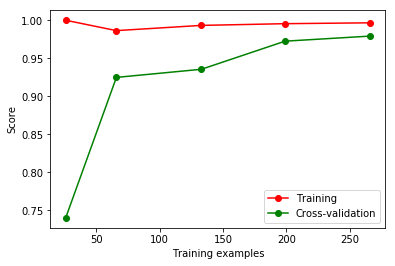

In [12]:
digits=datasets.load_digits()
X=digits.data[:300]
y=digits.target[:300]
train_sizes,train_score,test_score=learning_curve(SVC(gamma=0.001),X,y,cv=10,train_sizes=[0.1,0.25,0.5,0.75,1])
train_score_mean=np.mean(train_score,axis=1)
test_score_mean=np.mean(test_score,axis=1)
plt.plot(train_sizes,train_score_mean,'o-',color="r",label="Training")
plt.plot(train_sizes,test_score_mean,'o-',color="g",label="Cross-validation")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# 验证曲线

当需要开展估计器多个超参数的调优时，最简单的方式就是通过网格搜索或者随机搜索的方式，确定最终的最优参数组合。  
但需要估计模型是否因为某些超参数的值而出现过拟合或欠拟合，可通过绘制单个超参数对训练分数和验证分数的影响来进行观察，也即验证曲线。  
sklearn.model_selection.validation_curve(estimator, X, y, param_name, param_range, groups=None, cv=None, scoring=None, n_jobs=1, pre_dispatch='all', verbose=0)  
如果训练得分和验证得分都很低，则估计器是不合适的。如果训练得分高，验证得分低，则估计器过拟合， 否则估计会拟合得很好。通常不可能有较低的训练得分和较高的验证得分。

Text(0.5,0,'gamma')

Text(0,0.5,'Score')

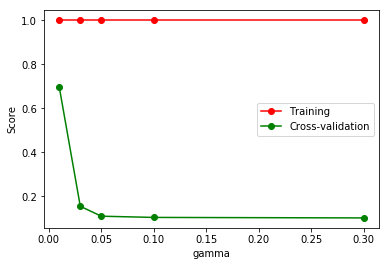

In [22]:
digits = load_digits()
X=digits.data
y=digits.target

param_range = [0.01,0.03,0.05,0.1,0.3]
train_scores, valid_scores = validation_curve(SVC(), X, y,param_name="gamma",param_range=param_range,cv=5,scoring="accuracy", n_jobs=1)
train_score_mean=np.mean(train_scores,axis=1)
test_score_mean=np.mean(valid_scores,axis=1)
plt.plot(param_range,train_score_mean,'o-',color="r",label="Training")
plt.plot(param_range,test_score_mean,'o-',color="g",label="Cross-validation")
plt.xlabel("gamma")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# 模型解释

In [ ]:
# feature_importance = pd.DataFrame({'column':  data_train_X.columns,'importance': gbm_model.feature_importances_})
# feature_importance = feature_importance.sort_values(by='importance',ascending=False)
# plt.figure(figsize=(15,6))
# sns.barplot(x="importance", y="column", data=feature_importance,orient='h')
# plt.show()

# 模型存取

In [ ]:
#方法一：pickle
# import pickle
# #保存
# with open('clf.pickle','wb') as f:
#      pickle.dump(clf,f)
# #读取
# with open('clf.pickle','rb') as f:
#     clf2=pickle.load(f)
#     print(clf2.predict(X[0:5]))

#方法二：joblib
# from sklearn.externals import joblib
# #保存
# joblib.dump(clf,'clf.pkl')
# #读取
# clf3=joblib.load('clf.pkl')
# print(clf3.predict(X[0:5]))